In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### NATIONAL STOCK EXCHANGE STOCKS OF THE INFOSIS

In [2]:
infosis= pd.read_csv('NSE-Prices.csv')

In [3]:
infosis


,Price Date,Open Price,High Price,Low Price,Close Price,Trade Value,Number Of Trades,Traded Quantity
0,11-08-2022,1630.0,1631.35,1616.00,1619.95,5.613034e+09,130406,3462090
1,10-08-2022,1621.2,1621.20,1588.10,1602.45,7.074914e+09,155928,4423829
2,08-08-2022,1617.0,1622.00,1596.00,1619.40,6.058239e+09,169613,3763409
3,05-08-2022,1608.4,1625.70,1602.30,1616.65,8.667508e+09,175709,5361971
4,04-08-2022,1587.5,1603.85,1574.95,1599.90,1.179737e+10,237197,7402209
...,...,...,...,...,...,...,...,...
1487,10-08-2016,1076.0,1087.90,1075.20,1082.35,3.013968e+09,72781,2788227
1488,09-08-2016,1077.0,1084.50,1071.50,1083.40,3.883366e+09,79692,3596332
1489,08-08-2016,1069.0,1081.00,1062.55,1078.70,2.495375e+09,86035,2321532
1490,05-08-2016,1072.0,1073.45,1060.00,1068.00,2.992534e+09,98969,2804984


In [4]:
infosis.isnull().sum()

Price Date          0
Open Price          0
High Price          0
Low Price           0
Close Price         0
Trade Value         0
Number Of Trades    0
Traded Quantity     0
dtype: int64

In [5]:
infosis.duplicated().sum()

0

In [6]:
infos = pd.DataFrame(infosis)

In [7]:
infos

,Price Date,Open Price,High Price,Low Price,Close Price,Trade Value,Number Of Trades,Traded Quantity
0,11-08-2022,1630.0,1631.35,1616.00,1619.95,5.613034e+09,130406,3462090
1,10-08-2022,1621.2,1621.20,1588.10,1602.45,7.074914e+09,155928,4423829
2,08-08-2022,1617.0,1622.00,1596.00,1619.40,6.058239e+09,169613,3763409
3,05-08-2022,1608.4,1625.70,1602.30,1616.65,8.667508e+09,175709,5361971
4,04-08-2022,1587.5,1603.85,1574.95,1599.90,1.179737e+10,237197,7402209
...,...,...,...,...,...,...,...,...
1487,10-08-2016,1076.0,1087.90,1075.20,1082.35,3.013968e+09,72781,2788227
1488,09-08-2016,1077.0,1084.50,1071.50,1083.40,3.883366e+09,79692,3596332
1489,08-08-2016,1069.0,1081.00,1062.55,1078.70,2.495375e+09,86035,2321532
1490,05-08-2016,1072.0,1073.45,1060.00,1068.00,2.992534e+09,98969,2804984


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense, Activation, Embedding, Dropout, TimeDistributed,Input

## Dividing data into 2 data parts which as test data and train data

In [9]:
infosis.dtypes

Price Date           object
Open Price          float64
High Price          float64
Low Price           float64
Close Price         float64
Trade Value         float64
Number Of Trades      int64
Traded Quantity       int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb = LabelEncoder()

In [12]:
infosis["Price Date"] = lb.fit_transform(infosis["Price Date"])
infosis["Open Price"] = lb.fit_transform(infosis["Open Price"])
infosis["High Price"] = lb.fit_transform(infosis["High Price"])
infosis["Low Price"] = lb.fit_transform(infosis["Low Price"])
infosis["Close Price"] = lb.fit_transform(infosis["Close Price"])
infosis["Trade Value"] = lb.fit_transform(infosis["Trade Value"])


In [13]:
infosis.dtypes

Price Date          int32
Open Price          int64
High Price          int64
Low Price           int64
Close Price         int64
Trade Value         int64
Number Of Trades    int64
Traded Quantity     int64
dtype: object

In [14]:
###df1 = infosis.iloc[:,5]

In [15]:
###df1.head

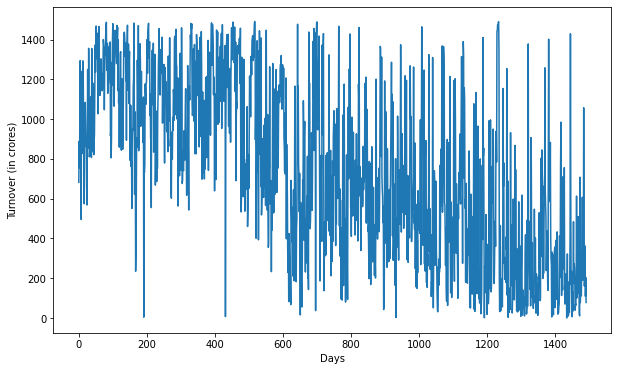

In [16]:
data = infosis.iloc[:,5].values
plt.figure(figsize=(10, 6))
plt.xlabel('Days')
plt.ylabel('Turnover (in crores)')
plt.plot(data)

In [17]:
infosis['Price Date']= pd.to_datetime(infosis['Price Date'])

In [18]:
len(infosis)

1492

In [19]:
print(1492*0.8)
print(1492-1198)


1193.6000000000001
294


In [20]:
mask = (infosis['Price Date'] == '2019-4-18')
print(infosis.loc[mask])     # index for the date 18-Apr-2019
print('--------------------------------------------')
train = data[:1193]
test = data[294:]

Empty DataFrame
Columns: [Price Date, Open Price, High Price, Low Price, Close Price, Trade Value, Number Of Trades, Traded Quantity]
Index: []
--------------------------------------------


In [21]:
sc = MinMaxScaler(feature_range = (0, 1))
train = sc.fit_transform(train.reshape(-1,1))
test = sc.transform(test.reshape(-1,1))

In [22]:
X_train = []
y_train = []
for i in range(30, train.shape[0]):
    X_train.append(train[i-10:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
print(X_train.shape, y_train.shape)
print(X_train)
print(y_train[:2])

(1163, 10) (1163,)
[[0.63959732 0.57785235 0.58590604 ... 0.59865772 0.57315436 0.90939597]
 [0.57785235 0.58590604 0.4442953  ... 0.57315436 0.90939597 0.62214765]
 [0.58590604 0.4442953  0.38053691 ... 0.90939597 0.62214765 0.54295302]
 ...
 [0.53624161 0.0590604  0.01342282 ... 0.26442953 0.94563758 0.54697987]
 [0.0590604  0.01342282 0.03892617 ... 0.94563758 0.54697987 0.57248322]
 [0.01342282 0.03892617 0.08255034 ... 0.54697987 0.57248322 0.28724832]]
[0.62214765 0.54295302]


In [24]:
# Training LSTM model

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model = Sequential()
# LSTM layer
model.add(LSTM(16, input_shape=(X_train.shape[1], 1), activation='relu',kernel_initializer='lecun_uniform'))
#  Dense layer
model.add(Dense(8))
model.add(Dense(4))
model.add(Dense(2))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 45, batch_size = 4)

Epoch 1/45
291/291 [==============================] - 3s 5ms/step - loss: 0.0505
Epoch 2/45
291/291 [==============================] - 1s 5ms/step - loss: 0.0373
Epoch 3/45
291/291 [==============================] - 1s 5ms/step - loss: 0.0372
Epoch 4/45
291/291 [==============================] - 1s 5ms/step - loss: 0.0361
Epoch 5/45
291/291 [==============================] - 1s 5ms/step - loss: 0.0365
Epoch 6/45
291/291 [==============================] - 1s 5ms/step - loss: 0.0361
Epoch 7/45
291/291 [==============================] - 1s 5ms/step - loss: 0.0360
Epoch 8/45
291/291 [==============================] - 1s 5ms/step - loss: 0.0359
Epoch 9/45
291/291 [==============================] - 1s 5ms/step - loss: 0.0362
Epoch 10/45
291/291 [==============================] - 2s 5ms/step - loss: 0.0359
Epoch 11/45
291/291 [==============================] - 1s 5ms/step - loss: 0.0364
Epoch 12/45
291/291 [==============================] - 1s 5ms/step - loss: 0.0353
Epoch 13/45
291/291 [====

In [25]:
X_test = []
y_test = []

for i in range(30, test.shape[0]):
    X_test.append(test[i-10:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)

(1168, 10)
(1163, 10, 1)


37/37 [==============================] - 0s 2ms/step


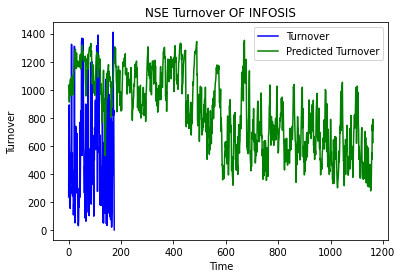

In [26]:
predicted = model.predict(X_train)
predicted = sc.inverse_transform(predicted)
plt.plot(sc.inverse_transform(train[-175:]), color = 'blue', label = 'Turnover')
plt.plot(predicted, color = 'green', label = 'Predicted Turnover')
plt.title('NSE Turnover OF INFOSIS')
plt.xlabel('Time')
plt.ylabel('Turnover')
plt.legend()
plt.show()

In [27]:
y_test_dummies = pd.get_dummies(y_test).values


In [28]:
model.save('InfosisStock.h5')

In [39]:
print(scores)

0.03994079306721687


In [51]:
type(scores)

float

In [58]:
scores = np.array(scores, dtype='int')
type(scores)

numpy.ndarray

In [57]:
from keras.models import load_model

model = load_model('InfosisStock.h5')
scores = model.evaluate(X_test, y_test)
a
LSTM_accuracy = scores[5]*100



37/37 [==============================] - 0s 1ms/step - loss: 0.0399


TypeError: 'float' object is not subscriptable